<a href="https://colab.research.google.com/github/bibekuchiha/EDA/blob/master/Chocolate%20Scraping%20with%20Beautiful%20Soup/Beautiful_Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

The URL is:

https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html

In [4]:
webpage_response = requests.get('https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html')

webpage = webpage_response.content

#Create a BeautifulSoup object called soup to traverse this HTML.
soup = BeautifulSoup(webpage, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

#How are ratings distributed?


How many terrible chocolate bars are out there? And how many earned a perfect 5? Let’s make a histogram of this data.




In [6]:
all_ratings_tags =soup.find_all(attrs={'class':'Rating'})

#Create an empty list called ratings to store all the ratings in.
ratings = []
#Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.
for tag in all_ratings_tags[1:]:
  ratings.append(float(tag.get_text()))


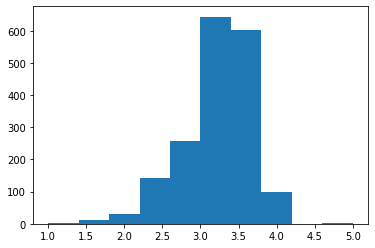

In [7]:
# create a histogram of the ratings values:
plt.hist(ratings)
plt.show()


Just like we did with ratings, we now want to make an empty list to hold company names.

In [10]:
company = soup.select('.Company')
company_name = []
for name in company[1:]:
  company_name.append(name.get_text())


We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacao to be better than those with lower levels of cacao.

It looks like the cocoa percentages are in the table under the Cocoa Percent column.

Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as an integer, after stripping off the % character.

In [13]:
CocoaPercentage = []
cocoa_percent_tags = soup.select(".CocoaPercent")
for td in cocoa_percent_tags[1:]:
    percent = float(td.get_text().strip('%'))
    CocoaPercentage.append(percent)

In [14]:
#Create a DataFrame with a column “Company” corresponding to your companies list, and a column “Ratings” and 'CocoaPercentage'
dataframe = {'company':company_name, 'ratings':ratings,'CocoaPercentage':CocoaPercentage}
df = pd.DataFrame.from_dict(dataframe)

#Which chocolatier makes the best chocolate?


Use .groupby to group your DataFrame by Company and take the average of the grouped ratings.

Then, use the .nlargest command to get the 10 highest rated chocolate companies. 

In [16]:
mean_vals = df.groupby('company')['ratings'].mean().nlargest(10).reset_index()
print(mean_vals)

                                company   ratings
0                Tobago Estate (Pralus)  4.000000
1  Heirloom Cacao Preservation (Zokoko)  3.875000
2                                Ocelot  3.875000
3                                Amedei  3.846154
4                                Matale  3.812500
5                                Patric  3.791667
6                     Idilio (Felchlin)  3.775000
7                                Acalli  3.750000
8                            Chocola'te  3.750000
9          Christopher Morel (Felchlin)  3.750000


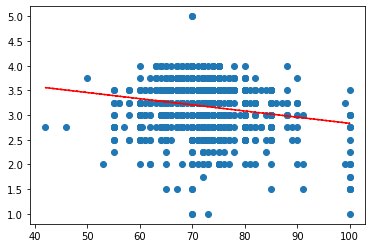

<Figure size 432x288 with 0 Axes>

In [17]:
#Make a scatterplot of ratings  vs percentage of cocoa .
plt.scatter(df.CocoaPercentage, df.ratings)
z = np.polyfit(df.CocoaPercentage, df.ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()
plt.clf()